# Finding Outliers

In [24]:
# Basics
import pandas as pd
import numpy as np

# Clustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# data
import seaborn as sns

In [163]:
# Dataset
df = sns.load_dataset('car_crashes')

# Creating very odd observations = OUTLIERS
s1 = pd.DataFrame([30,30,30,30,30,30,30,'AB']).T
s2 = pd.DataFrame([40,40,40,40,40,40,40,'AB']).T
s3 = pd.DataFrame([30,30,30,30,50,50,50,'AB']).T
s4 = pd.DataFrame([99,99,99,39,99,59,59,'AB']).T
s5 = pd.DataFrame([99,99,90,9,99,9,99,'AB']).T
s1.columns = s2.columns = s3.columns = s4.columns = s5.columns= df.columns

# Adding them to the dataset
df=pd.concat([df,s1, s2, s3, s4, s5], axis=0)

# X
X = df.drop('abbrev', axis=1)

### Using Local Outlier Factor (KNN)

In [164]:
# Let's create a Pipeline to scale the data and find outliers using KNN Classifier
steps = [
    ('scale', StandardScaler()),
    ('LOF', LocalOutlierFactor(contamination=0.09))
]

outliers = Pipeline(steps).fit_predict(X)

In [165]:
outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1])

In [166]:
df['outliers'] = outliers

In [167]:
df.sort_values(by='outliers').head(8)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,outliers
0,99,99,90,9,99,9,99,AB,-1
0,30,30,30,30,30,30,30,AB,-1
0,99,99,99,39,99,59,59,AB,-1
0,30,30,30,30,50,50,50,AB,-1
0,40,40,40,40,40,40,40,AB,-1
29,11.6,4.06,3.48,10.092,9.628,746.54,120.21,NH,1
30,11.2,1.792,3.136,9.632,8.736,1301.52,159.85,NJ,1
31,18.4,3.496,4.968,12.328,18.032,869.85,120.75,NM,1


In [100]:
tsne = TSNE(perplexity=8).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [101]:
tsne = pd.DataFrame(tsne, columns=['comp1', 'comp2'])

In [102]:
tsne['outliers'] = outliers

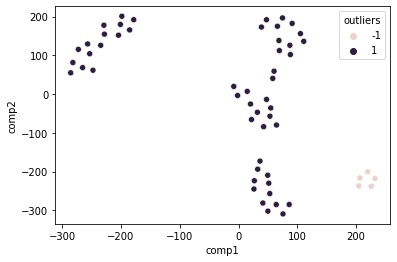

In [103]:
sns.scatterplot(data=tsne,
                x='comp1',
                y='comp2', 
                hue='outliers');

### Using GMM

In [186]:
# Dataset
df = sns.load_dataset('car_crashes')

# Creating very odd observations = OUTLIERS
s1 = pd.DataFrame([30,30,30,30,30,30,30,'AB']).T
s2 = pd.DataFrame([40,40,40,40,40,40,40,'AB']).T
s3 = pd.DataFrame([30,30,30,30,50,50,50,'AB']).T
s4 = pd.DataFrame([99,99,99,39,99,59,59,'AB']).T
s5 = pd.DataFrame([99,99,90,9,99,9,99,'AB']).T
s1.columns = s2.columns = s3.columns = s4.columns = s5.columns= df.columns

# Adding them to the dataset
df=pd.concat([df,s1, s2, s3, s4, s5], axis=0).reset_index(drop=True)

# X
X = df.drop('abbrev', axis=1)

In [187]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [188]:
# finding densities
density_scores = gm.score_samples(X)
density_scores = abs(density_scores)

# Define threshold
threshold = np.percentile(density_scores, 9)

# Finding outliers
X[density_scores < threshold]

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
51,30,30,30,30,30,30,30
52,40,40,40,40,40,40,40
53,30,30,30,30,50,50,50
54,99,99,99,39,99,59,59
55,99,99,90,9,99,9,99


In [189]:
threshold

16.361024931258825

In [192]:
X['densities'] = density_scores

In [193]:
X.sort_values(by='densities').head(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,densities
52,40,40,40,40,40,40,40,0.928969
51,30,30,30,30,30,30,30,0.928969
53,30,30,30,30,50,50,50,0.928969
54,99,99,99,39,99,59,59,0.928969
55,99,99,90,9,99,9,99,0.928969
7,16.2,6.156,4.86,14.094,16.038,1137.87,151.48,17.173238
32,12.3,3.936,3.567,10.824,9.84,1234.31,150.01,17.452713
39,11.1,3.774,4.218,10.212,8.769,1148.99,148.58,17.619087
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,17.733348
22,14.1,3.384,3.948,13.395,10.857,1110.61,152.26,17.749423
